<h1>Flight Data Analysis</h1>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB'] = r'C:\Users\PRATIK\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap

In [33]:
airport_names = ["id","name","city","country","code","icao","latitude","longitude","altitude","offset","dst","timezone","place","type"]
route_names = ["airline","airline_id","source","source_id","dest","dest_id","codeshare","stops","equipment"]

In [38]:
airports = pd.read_csv("airports.csv",names=airport_names)
airlines = pd.read_csv("airlines.csv")
routes = pd.read_csv("routes.csv",names=route_names)
geo_routes = pd.read_csv("geo_routes.csv")

In [35]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone,place,type
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [36]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [17]:
airports = airports.drop(["place"],axis=1)
airports = airports.drop(["type"],axis=1)

In [18]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby


In [19]:
m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

In [20]:
x , y = m(airports["longitude"].tolist(),airports["latitude"].tolist())

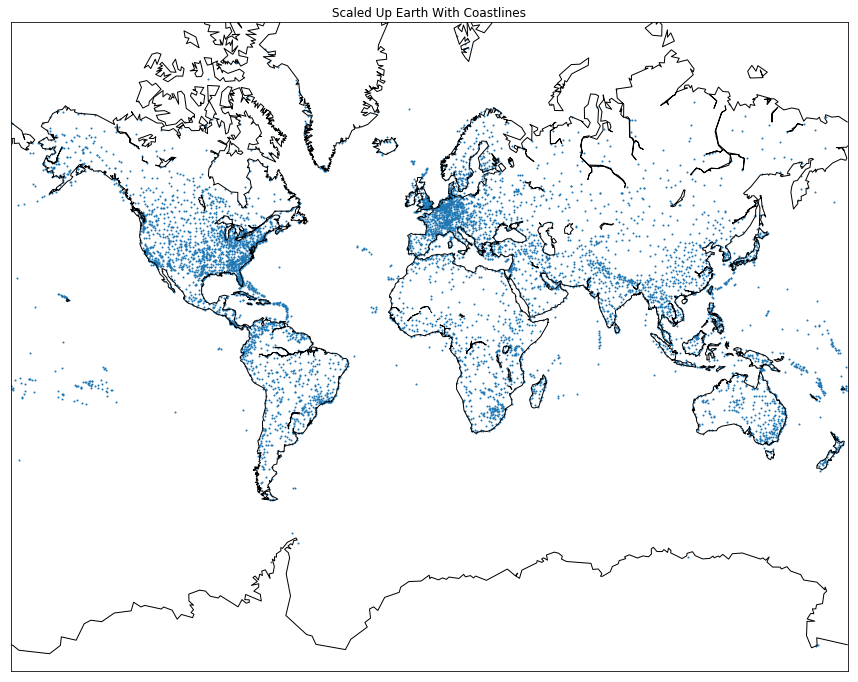

In [27]:
fig,ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")
m.scatter(x,y,s=1) #creating the scatter plot
m.drawcoastlines() #to view coast lines
plt.show()

In [39]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


In [40]:
geo_routes.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


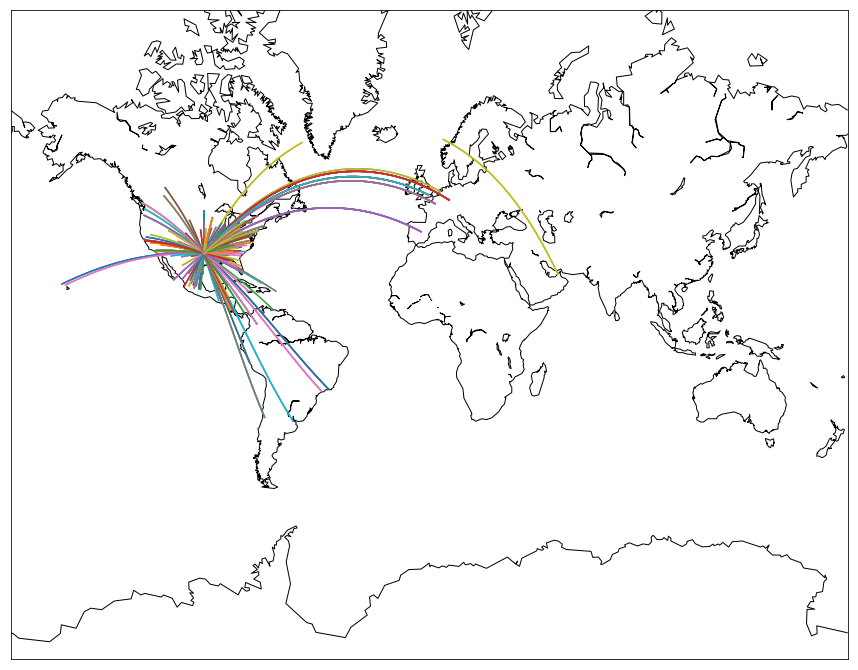

In [42]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index,row in df.iterrows():
        if abs(row["end_lat"] - row["start_lat"]) < 180:
            if abs(row["end_lon"] - row["start_lon"]) < 180:
                m.drawgreatcircle(row["start_lon"],row["start_lat"],row["end_lon"],row["end_lat"])

dfw = geo_routes.loc[geo_routes["source"]=="DFW"]
create_great_circles(dfw)
plt.show()